# Final Project Template 

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

# ***Title*** : 
 # *Prediction of the biodegradability of organic compounds starting from molecular descriptors*

# ***Aim of the project*** : 
  *Quantitative Structure-Activity Relationships study the relationship between the structure of molucules (and their computed molecular descriptors) and their function or behaviour. In the current project, a dataset of organic compounds known to be or not biodegrdable was used to train a model in order to predict the biodegradability (y) of molecules on the basis of their molecular descriptors.*
   

# ***Approach*** : 
- *a dataset of 1055 molecules characterized by 41 molecular descriptors (independent variables) and by a categoric dependent variable defining if the molecule is biodegradable or not was used*
- *being the label categoric, the approach has to be CLASSIFICATION*
- *K-Near Neighbors Classifier*
- *Random Forest Classifier*
- *In both cases a pipeline includind PCA decomposition and the classifier were exhaustively cross-validated employing GridSearchCV. The optimization of the number of PCA and K was performed in the case of K-Near Neighbors Classifie, and the optimization of the numbero of PAC, number of estimators and max depth in the case of the Random Forest Classifier. A KFold cross-validation was performed, with 3 splits of the dataset*
- *The biodegradable and non biodegradable character of a True Positive and True Negative external molecules were predicted with the two optimized estimators and the predicted label was compared to the experimental one*


# ***Results*** :

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

In [ ]:
# Enter link here. 
## Explanation: http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation# 
## Dataset: http://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [1]:
import urllib

URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/00254/biodeg.csv"
FILENAME = "biodeg.csv"

urllib.request.urlretrieve(URL, FILENAME)

('biodeg.csv', <http.client.HTTPMessage at 0x141efc90c08>)

## 4) Show me the head of your data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(FILENAME, sep=";", header=None)
print(data.head(10))


      0       1   2   3   4   5   6     7   8   9   ...  32  33  34     35  \
0  3.919  2.6909   0   0   0   0   0  31.4   2   0  ...   0   0   0  2.949   
1  4.170  2.1144   0   0   0   0   0  30.8   1   1  ...   0   0   0  3.315   
2  3.932  3.2512   0   0   0   0   0  26.7   2   4  ...   0   0   1  3.076   
3  3.000  2.7098   0   0   0   0   0  20.0   0   2  ...   0   0   1  3.046   
4  4.236  3.3944   0   0   0   0   0  29.4   2   4  ...   0   0   0  3.351   
5  4.236  3.4286   0   0   0   0   0  28.6   2   4  ...   0   0   0  3.351   
6  5.000  5.0476   1   0   0   0   0  11.1   0   3  ...   0   0   1  4.712   
7  4.525  3.8301   0   0   0   0   0  31.6   3   2  ...   0   0   0  3.379   
8  4.596  3.0777   0   0   0   0   2  44.4   2   0  ...   0   0   0  3.626   
9  5.040  3.6112   0   0   1   0   2  41.2   0   4  ...   1   2   1  3.888   

      36  37     38  39  40  41  
0  1.591   0  7.253   0   0  RB  
1  1.967   0  7.257   0   0  RB  
2  2.417   0  7.601   0   0  RB  
3  5.

In [3]:
print(data.shape)

(1055, 42)


In [4]:
column_names = ["SpMax_L", "J_Dz(e)", "nHM", "F01[N-N]", "F04[C-N]",
               "NssssC", "nCb-", "C%", "nCp", "nO",
               " F03[C-N]", "SdssC", "HyWi_B(m)", "LOC", "SM6_L", 
               "F03[C-O]", "Me", "Mi", "nN-N", "nArNO2", 
               "nCRX3", "SpPosA_B(p)", "nCIR", "B01[C-Br]", "B03[C-Cl]", 
               "N-073", "SpMax_A", "Psi_i_1d", "B04[C-Br]", "SdO",
               "TI2_L", "nCrt", "C-026", "F02[C-N]", "nHDon",
               "SpMax_B(m)", "Psi_i_A", "nN", "SM6_B(m)", "nArCOOR",
               "nX", "y"]

pd.set_option('display.max_columns', None)
data = pd.read_csv(FILENAME, sep=";", header=None, names = column_names)
print(data.head(10))

   SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  nO  \
0    3.919   2.6909    0         0         0       0     0  31.4    2   0   
1    4.170   2.1144    0         0         0       0     0  30.8    1   1   
2    3.932   3.2512    0         0         0       0     0  26.7    2   4   
3    3.000   2.7098    0         0         0       0     0  20.0    0   2   
4    4.236   3.3944    0         0         0       0     0  29.4    2   4   
5    4.236   3.4286    0         0         0       0     0  28.6    2   4   
6    5.000   5.0476    1         0         0       0     0  11.1    0   3   
7    4.525   3.8301    0         0         0       0     0  31.6    3   2   
8    4.596   3.0777    0         0         0       0     2  44.4    2   0   
9    5.040   3.6112    0         0         1       0     2  41.2    0   4   

    F03[C-N]  SdssC  HyWi_B(m)    LOC   SM6_L  F03[C-O]     Me     Mi  nN-N  \
0          0  0.000      3.106  2.550   9.002         0  0.960  1.142    

## 5) Show me the shape of your data

In [5]:
print(data.shape)

(1055, 42)


## 6) Show me the proportion of missing observations for each column of your data

In [6]:
data.isna().sum()

SpMax_L        0
J_Dz(e)        0
nHM            0
F01[N-N]       0
F04[C-N]       0
NssssC         0
nCb-           0
C%             0
nCp            0
nO             0
 F03[C-N]      0
SdssC          0
HyWi_B(m)      0
LOC            0
SM6_L          0
F03[C-O]       0
Me             0
Mi             0
nN-N           0
nArNO2         0
nCRX3          0
SpPosA_B(p)    0
nCIR           0
B01[C-Br]      0
B03[C-Cl]      0
N-073          0
SpMax_A        0
Psi_i_1d       0
B04[C-Br]      0
SdO            0
TI2_L          0
nCrt           0
C-026          0
F02[C-N]       0
nHDon          0
SpMax_B(m)     0
Psi_i_A        0
nN             0
SM6_B(m)       0
nArCOOR        0
nX             0
y              0
dtype: int64

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.


*The goal of this work is to train a model in order to be predictive on the biodegradability of organic molecules. A dataset of molecules with previously calculated molecular descriptors and measured biodegradability have beew used to train the model and a true positive and true negative external validation compouds were predicted with the two estimator and compared to their real values.*

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

*The y-variable is a categoric variable consisting in the binary outcome of non-biodegradable ('NBR') or biodegradable ('BR').*

In [7]:
y = data['y'].values

In [8]:
X = data.iloc[:, :-1].values

In [9]:
y.shape

(1055,)

In [10]:
X.shape

(1055, 41)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

In [12]:
knc = KNeighborsClassifier()

pca = decomposition.PCA()

pipe = Pipeline(steps=[('pca', pca), ('knc', knc)])

In [13]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=range(1,42),
                              knc__n_neighbors=range(1,51)),
                        cv=kf,)
estimator.fit(X, y)

print('# n_components:', estimator.best_estimator_.named_steps['pca'].n_components)
print('# n_neighbors:', estimator.best_estimator_.named_steps['knc'].n_neighbors)
print('# best_score:', estimator.best_score_)


# n_components: 23
# n_neighbors: 4
# best_score: 0.814218009478673


In [14]:
cv_df = pd.DataFrame(estimator.cv_results_)
cv_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knc__n_neighbors,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012633,0.004180,0.024600,0.008631,1,1,"{'knc__n_neighbors': 1, 'pca__n_components': 1}",0.573864,0.653409,0.606838,0.611374,0.032647,2050
1,0.004669,0.001248,0.012287,0.003301,1,2,"{'knc__n_neighbors': 1, 'pca__n_components': 2}",0.707386,0.690341,0.652422,0.683412,0.022963,2044


In [15]:
piv_df = cv_df.pivot(index="param_knc__n_neighbors",
           columns="param_pca__n_components",
           values="mean_test_score").round(3)

''

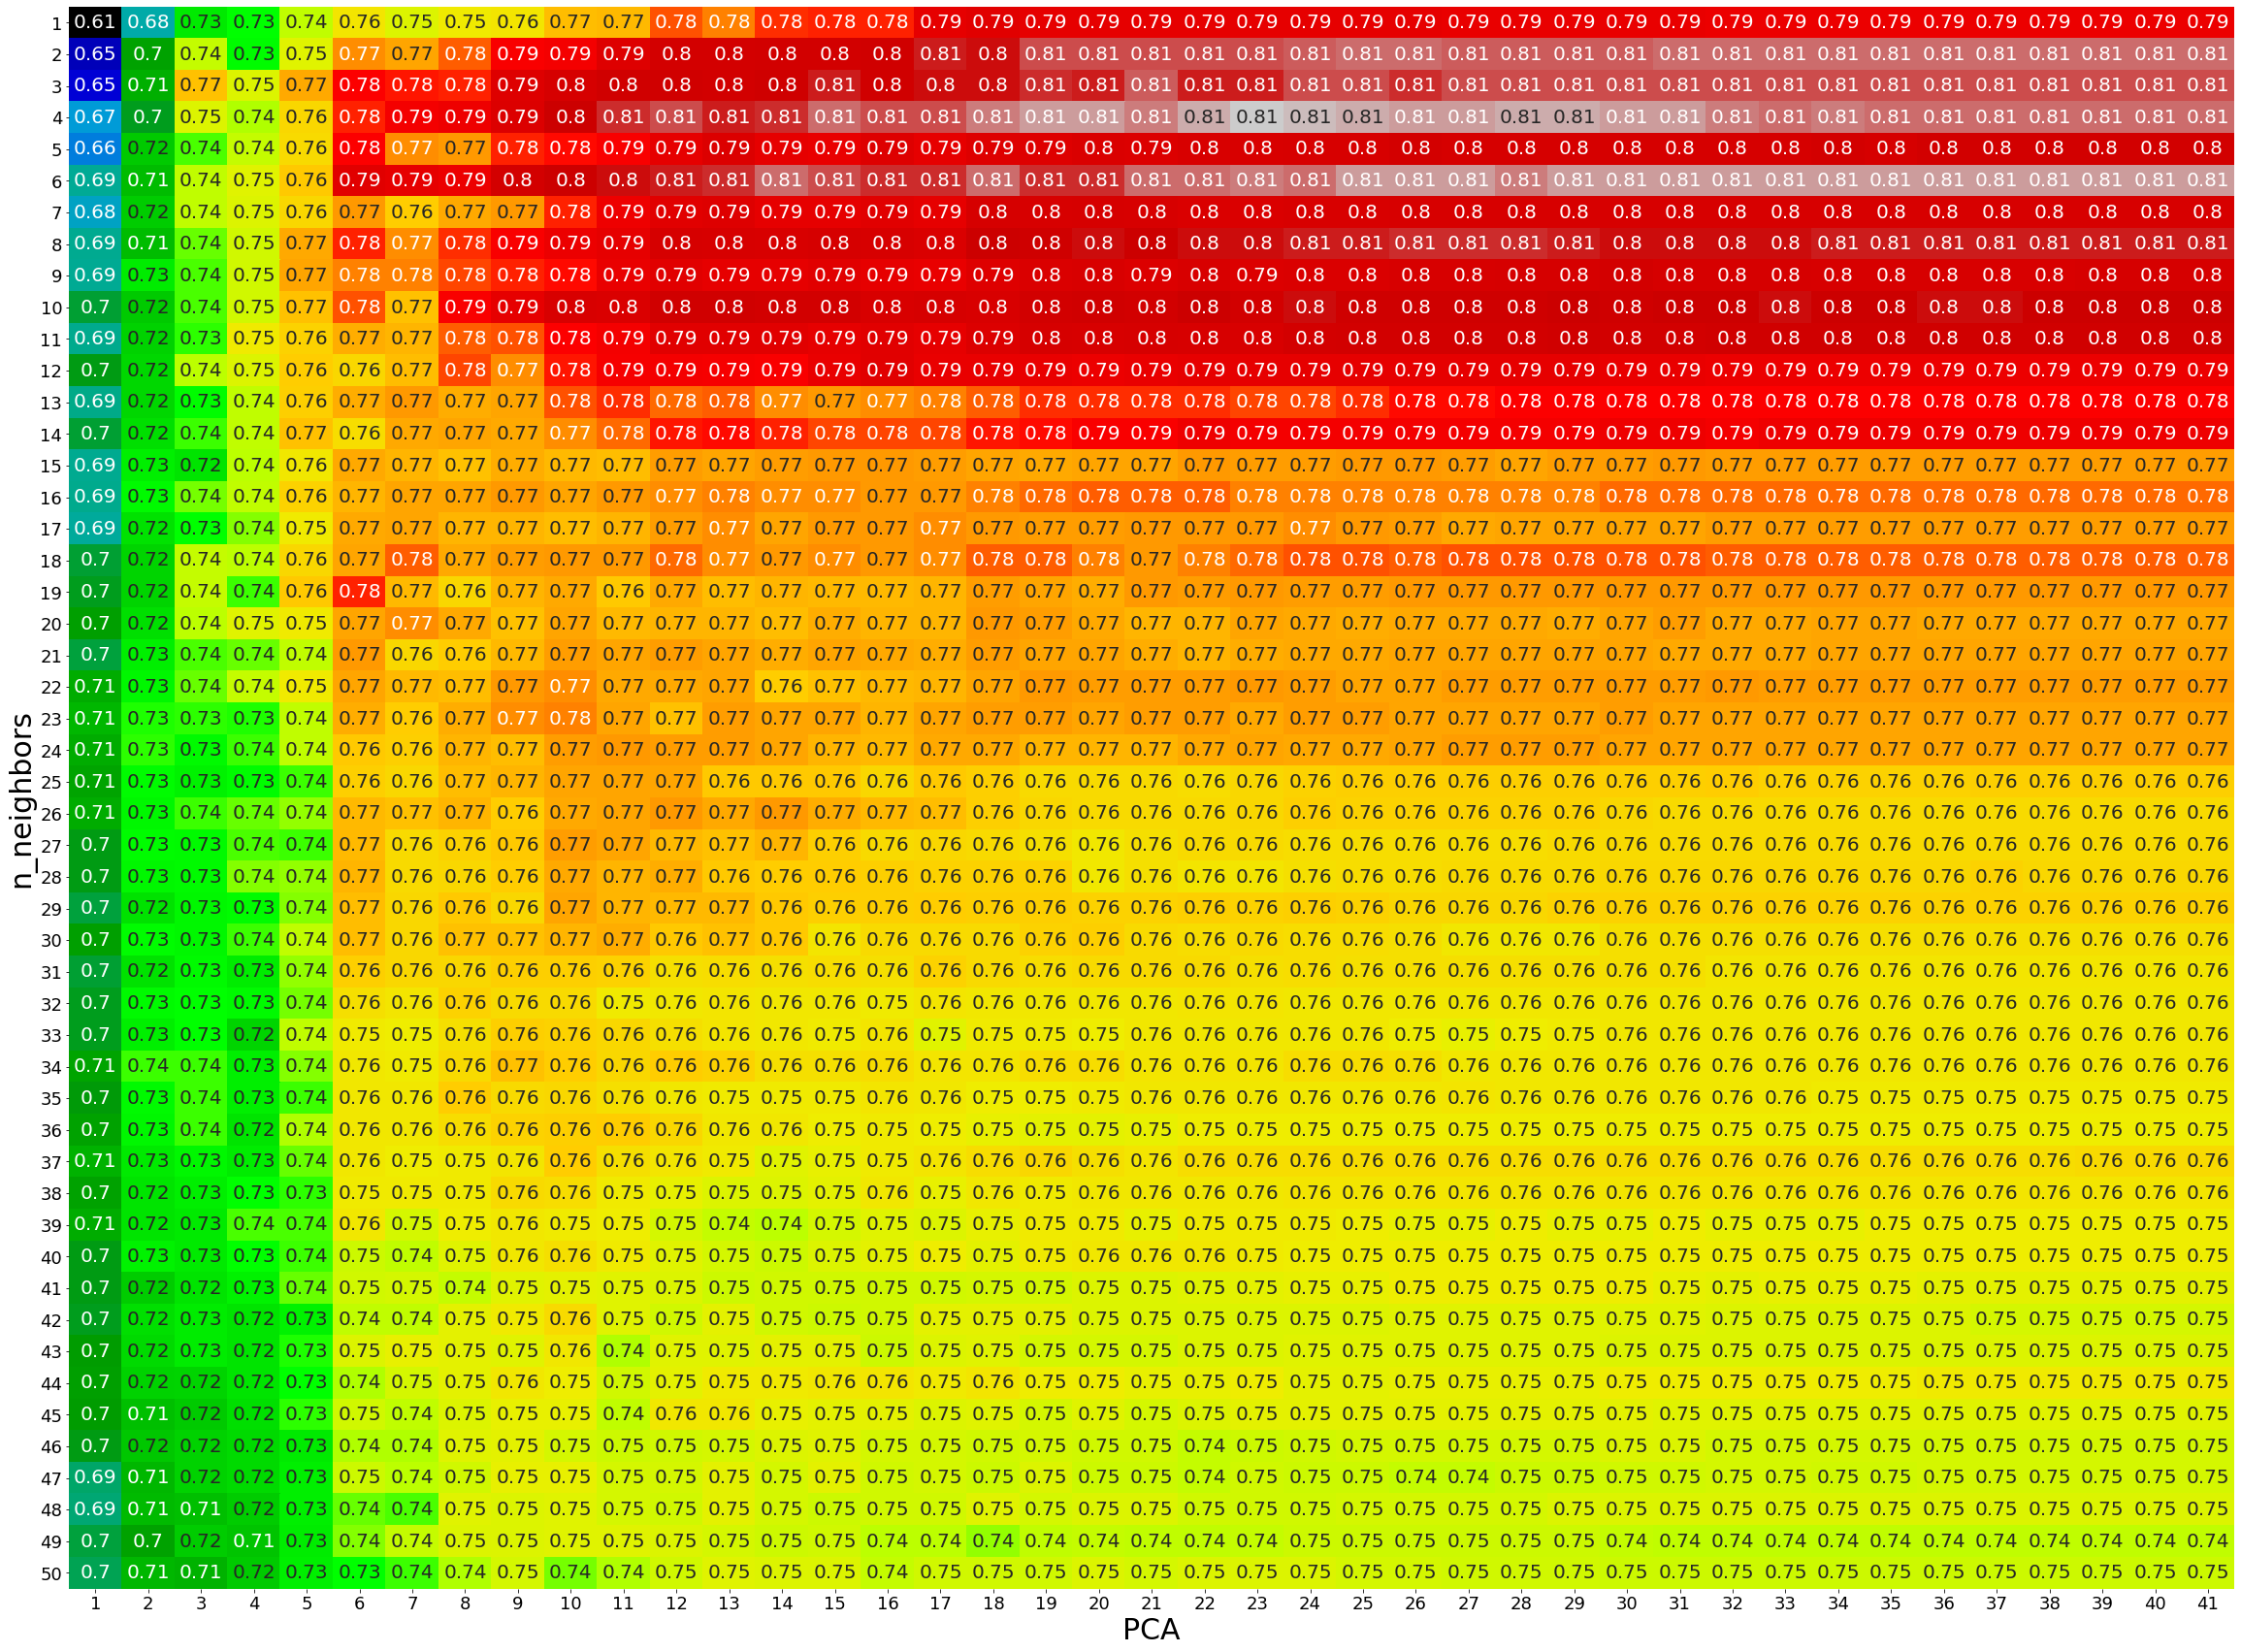

In [20]:
import seaborn as sns

##or create an heatmap with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(40,30))
ax = sns.heatmap(piv_df,
            cmap="nipy_spectral",
            cbar=False,
            annot=True,
            annot_kws={"size":20})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.xlabel('PCA', size=30)
plt.ylabel('n_neighbors', size=30)
plt.xticks(size=18)
plt.yticks(rotation=0, size=18)
;

In [31]:
rfr = RandomForestClassifier()

pca2 = decomposition.PCA()

pipe2 = Pipeline(steps=[('pca2', pca2), ('rfr', rfr)])

kf2 = KFold(n_splits=3, shuffle=True, random_state=42)

estimator2 = GridSearchCV(pipe2,
                         dict(pca2__n_components=range(1,21),
                              rfr__n_estimators=range(2,31),
                              rfr__max_depth=range(1,11)), 
                        cv=kf2,)

estimator2.fit(X, y)


print('# n_components:', estimator2.best_estimator_.named_steps['pca2'].n_components)
print('# n_estimators:', estimator2.best_estimator_.named_steps['rfr'].n_estimators)
print('# max_depth:'   , estimator2.best_estimator_.named_steps['rfr'].max_depth)
print('# best score:'   , estimator2.best_score_)


# n_components: 19
# n_estimators: 24
# max_depth: 9
# best score: 0.8701421800947867


In [32]:
cv_df2 = pd.DataFrame(estimator2.cv_results_)
cv_df2.head(600)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca2__n_components,param_rfr__max_depth,param_rfr__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021276,0.006111,0.001996,5.150430e-07,1,1,2,"{'pca2__n_components': 1, 'rfr__max_depth': 1,...",0.588068,0.650568,0.680912,0.639810,0.038651,5789
1,0.012965,0.004230,0.001994,5.840039e-07,1,1,3,"{'pca2__n_components': 1, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
2,0.009974,0.000001,0.002327,4.691229e-04,1,1,4,"{'pca2__n_components': 1, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
3,0.009975,0.001630,0.001661,4.691245e-04,1,1,5,"{'pca2__n_components': 1, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
4,0.010305,0.000470,0.001662,4.703027e-04,1,1,6,"{'pca2__n_components': 1, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.019934,0.000798,0.002341,4.900275e-04,3,1,17,"{'pca2__n_components': 3, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
596,0.019284,0.000943,0.002314,4.508590e-04,3,1,18,"{'pca2__n_components': 3, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
597,0.020931,0.002159,0.002673,4.796774e-04,3,1,19,"{'pca2__n_components': 3, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247
598,0.023936,0.003732,0.003656,4.706960e-04,3,1,20,"{'pca2__n_components': 3, 'rfr__max_depth': 1,...",0.656250,0.650568,0.680912,0.662559,0.013165,5247


''

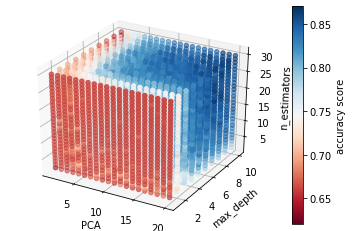

In [56]:
from mpl_toolkits.mplot3d import Axes3D

#piv_df_2 = pd.pivot_table(cv_df2, index="param_rfr__max_depth",
#           columns=["param_pca2__n_components", "param_rfr__n_estimators"],
#           values="mean_test_score").round(3)

x_pca = cv_df2.loc[:, "param_pca2__n_components"].values
y_max_depth = cv_df2.loc[:, "param_rfr__max_depth"].values
z_n_estimators = cv_df2.loc[:, "param_rfr__n_estimators"].values
c_score = cv_df2.loc[:, "mean_test_score"].values


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
#img = ax.scatter(list(x), list(y), list(z), c=list(c), cmap="RdBu", marker='o')
img = ax.scatter(x_pca, y_max_depth, list(z_n_estimators), c=c_score, cmap="RdBu", marker='o')

plt.colorbar(img).set_label('accuracy score')
ax.set_xlabel('PCA')
ax.set_ylabel('max_depth')
ax.set_zlabel('n_estimators')
;

In [35]:
validationdata = pd.read_excel("external_validation_subset.xlsx")
print(validationdata.head(10))

         CAS-RN                                             Smiles class  \
0   16421-40-2'  COc1cc(N=Nc2c(Cl)cc(cc2N(=O)=O)N(=O)=O)c(cc1N(...   NRB   
1  '14167-59-0'                 CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC    RB   

   SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  nO  \
0    5.146   2.3537    1         1        15       0     9  39.4    2   8   
1    3.991   2.9922    0         0         0       0     0  32.7    2   0   

   F03[C-N]  SdssC  HyWi_B(m)    LOC   SM6_L  F03[C-O]     Me     Mi  nN-N  \
0        18 -0.878      4.696  1.471  11.447        12  1.036  1.133     0   
1         0  0.000      4.228  4.087  10.288         0  0.961  1.140     0   

   nArNO2  nCRX3  SpPosA_B(p)  nCIR  B01[C-Br]  B03[C-Cl]  N-073  SpMax_A  \
0       2      0        1.234     3          0          1      0    2.439   
1       0      0        1.213     0          0          0      0    1.992   

   Psi_i_1d  B04[C-Br]     SdO   TI2_L  nCrt  C-026  F02[C-N]  nHDon  \


In [36]:
X1 = validationdata.iloc[0, 3:].values.reshape(1, -1)

In [37]:
y1 = validationdata.iloc[0, 2]

In [38]:
X2 = validationdata.iloc[1, 3:].values.reshape(1, -1)

In [39]:
y2 = validationdata.iloc[1, 2]

In [40]:
print(X.shape)
print(X1.shape)
print(X2.shape)
for row in X:
    if np.array_equal(row, X1) == True:
        print(X1)
        print(row)
    if np.array_equal(row, X2) == True:
        print(X2)
        print(row)

(1055, 41)
(1, 41)
(1, 41)


In [48]:
y1_predicted = estimator.predict(X1)
y2_predicted = estimator.predict(X2)

print("KNN Predicted y1")
print(y1_predicted)
print("y1")
print(y1)
print("KNN Predicted y2")
print(y2_predicted)
print("y2")
print(y2)

KNN Predicted y1
['NRB']
y1
NRB
KNN Predicted y2
['RB']
y2
RB


In [50]:
y1_predicted2 = estimator2.predict(X1)
y2_predicted2 = estimator2.predict(X2)

print("RF Predicted y1")
print(y1_predicted2)
print("y1")
print(y1)
print("RF Predicted y2")
print(y2_predicted2)
print("y2")
print(y2)

RF Predicted y1
['NRB']
y1
NRB
RF Predicted y2
['RB']
y2
RB


# ***Discussion*** :
- *both models showed a good cross-validation score after hyperparameter optimization, in particular an accuracy score of 0.81 was obtained with 23 PCs and K=4 in the case ok K-Near Neighbors classifier and an accuracy score of 0.87 was obtained with 19 PCs, 24 estimators and max depth of 9 in the case of the Random Forest Classifier.*
- *The two models were used to predict the biodegradability character of two molecules external to the dataset, and the predicted results were in agreement with the experimental ones.*
